In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 데이터 분석
import numpy as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 군집화
from sklearn.model_selection import train_test_split            # train / test 데이터셋 분리
from sklearn.decomposition import PCA                           # 차원 축소
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # for 표준화, 정규화 
from sklearn.cluster import KMeans                              # 비지도 학습 - 클러스터링 ; Kmeans

# csv 파일 저장
import csv
import time
import datetime

In [3]:
file_path1 = "/content/drive/Othercomputers/내 노트북/Project/Models/Music_Genre_Classification_Recommendation/Feature_Result_csv/20220326-141916.csv"                       # 피처값 csv 파일 경로
file_path2 = "/content/drive/Othercomputers/내 노트북/Project/Models/Music_Genre_Classification_Recommendation/Feature_Result_csv/20220325-155320.csv"

df_file1 = pd.read_csv(file_path1, index_col=0)
df_file2 = pd.read_csv(file_path2, index_col=0)
df_soundwave = pd.concat([df_file1, df_file2], axis=0)                      # classic 장르 피처값 csv 읽기
df_soundwave.head()

,song,centroid_max,centroid_min,centroid_mean,centroid_std,centroid_kurtosis,centroid_skew,roloff_max,roloff_min,roloff_mean,...,mfcc_18_std,mfcc_18_kurtosis,mfcc_18_skew,mfcc_19_max,mfcc_19_min,mfcc_19_mean,mfcc_19_std,mfcc_19_kurtosis,mfcc_19_skew,tempo
0,blues.00000.wav,4031.364538,1027.079258,1784.420446,360.263361,5.246790,1.537974,7644.287109,1830.322266,3806.485316,...,7.422605,1.236302,0.492951,32.866340,-23.219631,1.219928,6.853561,0.534537,0.258880,123.046875
1,blues.00002.wav,4669.770713,417.254802,1552.481958,395.634070,11.609763,1.930126,6556.860352,441.430664,3040.514948,...,6.828190,0.349044,0.675960,16.524359,-29.785427,-2.226821,5.529573,0.976377,-0.080558,161.499023
2,blues.00003.wav,3236.442116,318.713500,1070.119953,429.532791,1.803354,1.001449,7611.987305,387.597656,2185.028454,...,6.107267,0.175515,-0.124392,16.595015,-21.426250,-3.408233,5.654808,0.880601,0.255001,172.265625
3,blues.00004.wav,4464.156642,849.658285,1835.494603,585.961468,1.536058,1.049734,7084.423828,1152.026367,3580.945013,...,7.932865,0.378629,-0.042242,4.889854,-41.730530,-11.703781,7.432079,0.651141,-0.701559,135.999178
4,blues.00010.wav,3202.187008,436.072310,1410.469096,453.302918,0.489085,0.669760,6707.592773,516.796875,2767.274933,...,6.872131,0.929898,-0.062250,20.802301,-29.235157,-4.986113,6.826524,1.310209,0.176304,161.499023


In [12]:
df_soundwave.duplicated(subset=['song']).sum()  # 중복값 확인

388

In [13]:
df_soundwave.drop_duplicates(subset=['song'], inplace=True, ignore_index=True)  # 중복값 삭제

In [15]:
# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# MinMaxScaler 로 데이터 셋 변환 .fit( ) 과 .transform( ) 호출
df_scaler = df_soundwave.iloc[:, 1:]    # song 컬럼 제외하고 표준화 진행
scaler.fit(df_scaler)                   # 데이터 범위가 [0, 1]이 되도록 최솟값은 0, 최댓값은 1을 갖도록 모델을 학습
df_scaled = scaler.transform(df_scaler) # [0, 1] 범위에 따르도록 데이터 값을 ndarray 형식으로 받기

# transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
columns = df_soundwave.columns[1:]      # 밑에 변환할 때 리스트 값으로 넣어줘야함
df_sw = pd.DataFrame(data=df_scaled, columns=columns)

In [16]:
df_sw.tail()

,centroid_max,centroid_min,centroid_mean,centroid_std,centroid_kurtosis,centroid_skew,roloff_max,roloff_min,roloff_mean,roloff_std,...,mfcc_18_std,mfcc_18_kurtosis,mfcc_18_skew,mfcc_19_max,mfcc_19_min,mfcc_19_mean,mfcc_19_std,mfcc_19_kurtosis,mfcc_19_skew,tempo
1810,0.383141,0.536289,0.498225,0.217944,0.019250,0.192846,0.644737,0.520947,0.495840,0.227210,...,0.252271,0.079507,0.360701,0.349439,0.655800,0.586996,0.255089,0.104658,0.546456,0.595142
1811,0.711188,0.295923,0.565562,0.469053,0.057472,0.237674,0.855263,0.147541,0.616147,0.499180,...,0.242328,0.517636,0.731191,0.476053,0.657802,0.537318,0.245554,0.179439,0.506074,0.595142
1812,0.761701,0.578114,0.630299,0.381963,0.104577,0.360728,0.890351,0.453552,0.748305,0.406171,...,0.328870,0.172935,0.455104,0.581075,0.692539,0.656507,0.361113,0.140301,0.651034,0.658120
1813,0.552932,0.342364,0.483942,0.273382,0.071202,0.205028,0.777412,0.224044,0.521280,0.400248,...,0.222216,0.269582,0.093264,0.370606,0.852094,0.679302,0.203853,0.103828,0.569065,0.807692
1814,0.661754,0.194435,0.431122,0.346890,0.117447,0.353752,0.821272,0.140255,0.473118,0.517013,...,0.265463,0.080365,0.311221,0.432463,0.453343,0.512412,0.332128,0.171839,0.481658,0.358974


In [ ]:
# MinMaxScaler() Ver
#from sklearn.model_selection import train_test_split

# train-test 분리 => 사실 어떤 기준으로 분류해야 하는지 모르겠음...ㅎ
# 난 tempo를 y_train으로 놓긴 했는데... 왜 비지도 학습에서 train / test 데이터셋을 나누지?
#X = df_sw.iloc[:, :-1]
#Y = df_sw[['tempo']].values
#test_size = 0.2
#random_state = 2022

#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state) 

# train-validation 분리
#X2_train, X2_val, y2_train, y_val = train_test_split(X_train, y_train)

In [ ]:
#X_train.shape, y_train.shape, X2_train.shape, y2_train.shape

In [ ]:
# 정규화 - MinMaxScaler - train 데이터만 진행
#n_components = 2   
#random_state = 2022

#pca = PCA(n_components=n_components, random_state=random_state)

#X_train_PCA = pca.fit_transform(X_train)        
#X_train_PCA = pd.DataFrame(data=X_train_PCA, index=X_train.index)

#X_train_PCA_inverse = pca.inverse_transform(X_train_PCA)
#X_train_PCA_inverse = pd.DataFrame(data=X_train_PCA_inverse, index=X_train.index)

In [ ]:
#X_train_PCA

In [ ]:
#sum(pca.explained_variance_ratio_) # 정규화 - 설명된 분산 비율 (전체 고유값 중에서 원하는 고유값의 비율) // 클수록 정보 손실 작음

In [ ]:
# pca(2차원 축소) - 시각화
# MinMaxScaler Ver - 정규화
#plt.figure(figsize=(15,8))
#plt.scatter(X_train_PCA.iloc[:,0], X_train_PCA.iloc[:,1], label='song data')
#plt.legend(loc = 'best')
#plt.xlabel('X')
#plt.ylabel('Y')
#plt.show();

In [18]:
# 정규화 - MinMaxScaler - 전체 데이터
n_components = 2   
random_state = 2022

pca = PCA(n_components=n_components, random_state=random_state)

X_PCA = pca.fit_transform(df_sw)        
X_PCA = pd.DataFrame(data=X_PCA, index=df_sw.index)

X_PCA_inverse = pca.inverse_transform(X_PCA)
X_PCA_inverse = pd.DataFrame(data=X_PCA_inverse, index=df_sw.index)

# scatterPlot(X_train_PCA, y_train, "PCA") -> 시각화 방법을 ... 알아보자 ! 핳

In [19]:
X_PCA

,0,1
0,0.430702,-0.599778
1,0.260578,-0.143721
2,0.487306,0.118469
3,0.520246,0.146921
4,0.189327,0.579609
...,...,...
1810,0.241255,-0.477628
1811,0.140040,0.008194
1812,-0.262778,0.052358
1813,-0.124083,-0.600436


In [20]:
sum(pca.explained_variance_ratio_)

0.3813882786293101

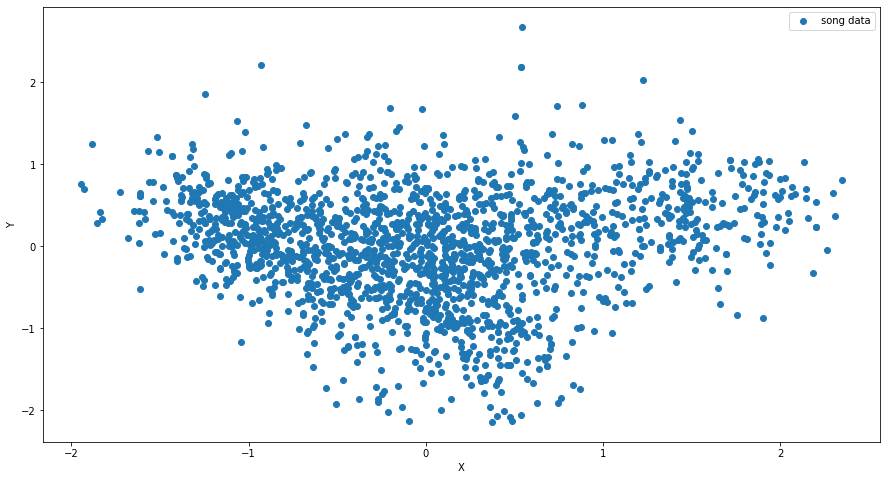

In [21]:
# pca(2차원 축소) - 시각화
# MinMaxScaler Ver - 정규화
plt.figure(figsize=(15,8))
plt.scatter(X_PCA.iloc[:,0], X_PCA.iloc[:,1], label='song data')
plt.legend(loc = 'best')
plt.xlabel('X')
plt.ylabel('Y')
plt.show();

### Kmeans - Kmeans++

#### 최적의 k 찾기 - elbow method

In [ ]:
# X_train_PCA 대상으로 최적의 k 찾기
#from yellowbrick.cluster import KElbowVisualizer

#model = KMeans(init='k-means++', n_clusters=10, random_state=42)
#visualizer = KElbowVisualizer(model, k=(4,40))

#visualizer.fit(X_train_PCA)        # Fit the data to the visualizer
#visualizer.show();                  # Finalize and render the figure

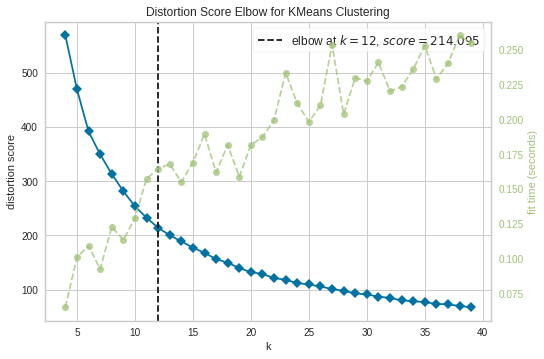

In [22]:
# X_PCA(전체 데이터) 대상으로 최적의 k 찾기
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(init='k-means++', n_clusters=10, random_state=2022)
visualizer = KElbowVisualizer(model, k=(4,40))

visualizer.fit(X_PCA)        # Fit the data to the visualizer
visualizer.show();        # Finalize and render the figure

> - k 갯수 : 7개가 적당한 것으로 보임

#### k-평균 : 군집 수 변화에 따른 관성
- k에 따라 inertia_(군집 내 거리제곱합의 합)이 어떻게 변하는가

In [ ]:
# X_train_PCA 대상으로 k-평균 관성 계산

#n_init = 10
#max_iter = 300
#tol = 0.0001
#verbose = 0
#random_state = 2022
#algorithm = 'auto'

#kmeans_inertia = pd.DataFrame(data=[], index=range(2,21), columns=['inertia'])
#for n_clusters in range(2,21):
#    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=n_init, 
#                    max_iter=max_iter, tol=tol, verbose=verbose, random_state=random_state, algorithm=algorithm)
#    cutoff = 99
#    kmeans.fit(X_train_PCA.loc[:,0:cutoff])
#    kmeans_inertia.loc[n_clusters] = kmeans.inertia_

In [ ]:
#kmeans_inertia

In [23]:
# X_PCA(전체 데이터) 대상으로 k-평균 관성 계산

n_init = 10
max_iter = 300
tol = 0.0001
verbose = 0
random_state = 2022
algorithm = 'auto'

kmeans_inertia_a = pd.DataFrame(data=[], index=range(2,21), columns=['inertia'])
for n_clusters in range(2,21):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=n_init, 
                    max_iter=max_iter, tol=tol, verbose=verbose, random_state=random_state, algorithm=algorithm)
    cutoff = 99
    kmeans.fit(X_PCA.loc[:,0:cutoff])
    kmeans_inertia_a.loc[n_clusters] = kmeans.inertia_

In [24]:
kmeans_inertia_a

,inertia
2,1282.722042
3,753.020378
4,569.178028
5,469.58167
6,392.018863
7,349.575903
8,313.401912
9,281.644956
10,253.823903
11,232.783071


> - k 갯수 : 6~10개가 적당한 것으로 보임
    - 참고 사이트 : https://eunsukimme.github.io/ml/2019/12/16/K-Means/

### 클러스터링 진행
    - labels_ : 각 데이터 포인트가 속한 군집 중심점 레이블
    - cluster_centers_ : 각 군집 중심점 좌표. 이를 이용하면 군집 중심점 좌표가 어디인지 시각화할 수 있습니다.
    - n_iter_ : 수행된 이동 횟수
> - k = 6

In [25]:
n_clusters = 6
random_state=2022

km6 = KMeans(init='k-means++', n_clusters=n_clusters, random_state=random_state)
km6.fit(X_PCA)

KMeans(n_clusters=6, random_state=2022)

In [26]:
# 중심점(centroids) 위치
centers6 = km6.cluster_centers_
centers6

array([[-1.07618187,  0.4443596 ],
       [ 0.0791617 ,  0.68277502],
       [ 0.34713748, -0.1671386 ],
       [ 1.44280364,  0.45254417],
       [-0.55787003, -0.26579678],
       [ 0.20021047, -1.18170894]])

In [27]:
# 군집화 결과 라벨링 기존 데이터 프레임에 새로운 컬럼으로 삽입하기
df_soundwave['cluster6'] = km6.fit_predict(X_PCA)

In [28]:
df_soundwave.tail(3)

,song,centroid_max,centroid_min,centroid_mean,centroid_std,centroid_kurtosis,centroid_skew,roloff_max,roloff_min,roloff_mean,...,mfcc_18_kurtosis,mfcc_18_skew,mfcc_19_max,mfcc_19_min,mfcc_19_mean,mfcc_19_std,mfcc_19_kurtosis,mfcc_19_skew,tempo,cluster6
1812,10분 내로-김연자_30.wav,6896.682494,1443.729408,2949.338935,703.271173,5.844847,1.890425,9722.241211,2680.883789,6646.676475,...,0.632032,0.436896,41.290916,-23.750210,3.242226,9.922538,0.505130,0.671343,143.554688,4
1813,사랑의 트위스트-설운도_30.wav,5206.455338,854.989721,2361.416274,520.588591,3.560736,0.544171,8613.281250,1324.291992,4815.887546,...,1.393292,-0.680192,27.008787,-15.746796,4.046974,6.830245,0.075743,0.327824,161.499023,4
1814,짱가-김건모_30.wav,6087.494942,485.565736,2149.236477,644.260918,6.725649,1.830110,9043.945312,829.028320,4427.498228,...,-0.097106,-0.007306,31.206330,-35.748447,-1.844921,9.352575,0.876417,-0.038484,107.666016,1


In [29]:
# 클러스터 레이블 확인
new_labels6 = km6.labels_

# 클러스터링 결과 각 데이터 갯수
np.unique(new_labels6, axis=0, return_counts=1)

(array([0, 1, 2, 3, 4, 5], dtype=int32), array([340, 261, 339, 263, 362, 250]))

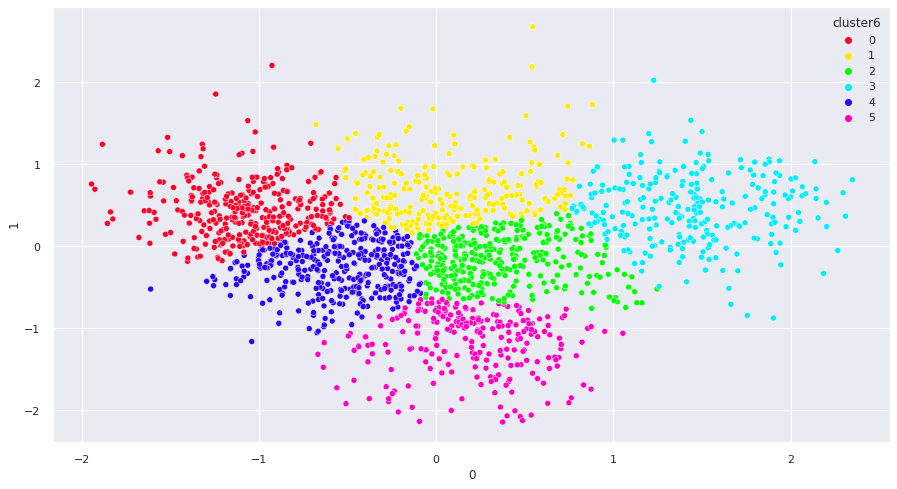

In [30]:
# k = 6 시각화

x = X_PCA.iloc[:,0]
y = X_PCA.iloc[:,1]

sns.set(rc={"figure.figsize":(15, 8)})
sns.scatterplot(x=x, y=y, hue='cluster6', data=df_soundwave, palette='gist_rainbow');

-> 음원 확인 결과 완벽히 클러스터링 되지 않은 듯함

> - k = 8

In [40]:
n_clusters = 8
random_state=2022

km8 = KMeans(init='k-means++', n_clusters=n_clusters, random_state=random_state)
km8.fit(X_PCA)

KMeans(random_state=2022)

In [41]:
# 중심점(centroids) 위치
centers8 = km8.cluster_centers_
centers8

array([[-0.30059378, -0.6646386 ],
       [ 0.94824037,  0.00946313],
       [ 0.31747074, -1.262358  ],
       [-1.14073869,  0.61987009],
       [-0.8310287 , -0.00229819],
       [ 0.09419231,  0.77311738],
       [ 1.56932414,  0.60601789],
       [ 0.090735  , -0.06144837]])

In [42]:
# 군집화 결과 라벨링 기존 데이터 프레임에 새로운 컬럼으로 삽입하기
df_soundwave['cluster8'] = km8.fit_predict(X_PCA)

In [43]:
df_soundwave.tail(3)

,song,centroid_max,centroid_min,centroid_mean,centroid_std,centroid_kurtosis,centroid_skew,roloff_max,roloff_min,roloff_mean,...,mfcc_18_skew,mfcc_19_max,mfcc_19_min,mfcc_19_mean,mfcc_19_std,mfcc_19_kurtosis,mfcc_19_skew,tempo,cluster6,cluster8
1812,10분 내로-김연자_30.wav,6896.682494,1443.729408,2949.338935,703.271173,5.844847,1.890425,9722.241211,2680.883789,6646.676475,...,0.436896,41.290916,-23.750210,3.242226,9.922538,0.505130,0.671343,143.554688,4,7
1813,사랑의 트위스트-설운도_30.wav,5206.455338,854.989721,2361.416274,520.588591,3.560736,0.544171,8613.281250,1324.291992,4815.887546,...,-0.680192,27.008787,-15.746796,4.046974,6.830245,0.075743,0.327824,161.499023,4,0
1814,짱가-김건모_30.wav,6087.494942,485.565736,2149.236477,644.260918,6.725649,1.830110,9043.945312,829.028320,4427.498228,...,-0.007306,31.206330,-35.748447,-1.844921,9.352575,0.876417,-0.038484,107.666016,1,5


In [45]:
# 클러스터 레이블 확인
new_labels8 = km8.labels_

# 클러스터링 결과 각 데이터 갯수
np.unique(new_labels8, axis=0, return_counts=1)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([213, 177, 193, 215, 305, 207, 181, 324]))

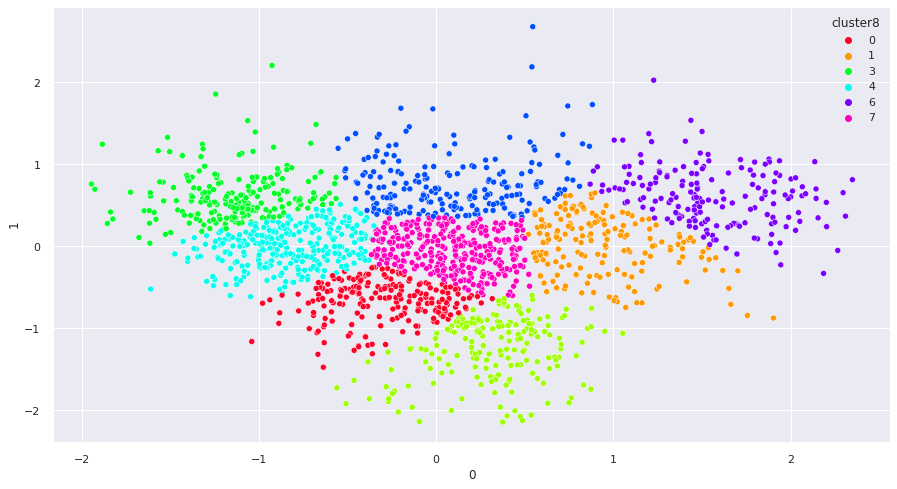

In [46]:
# k = 8 시각화

x = X_PCA.iloc[:,0]
y = X_PCA.iloc[:,1]

sns.set(rc={"figure.figsize":(15, 8)})
sns.scatterplot(x=x, y=y, hue='cluster8', data=df_soundwave, palette='gist_rainbow');

> - k = 10

In [55]:
n_clusters = 10
random_state=2022

km10 = KMeans(init='k-means++', n_clusters=n_clusters, random_state=random_state)
km10.fit(X_PCA)

KMeans(n_clusters=10, random_state=2022)

In [56]:
# 중심점(centroids) 위치
centers10 = km10.cluster_centers_
centers10

array([[ 1.32794114, -0.07120617],
       [-0.34852521, -0.64109759],
       [ 0.59546227,  0.45680425],
       [ 0.29801463, -1.30498871],
       [-1.15113531,  0.6097609 ],
       [-0.93704461, -0.04664809],
       [ 1.60061888,  0.70825071],
       [-0.06942887,  1.05804059],
       [-0.22922272,  0.20888116],
       [ 0.28373346, -0.29445237]])

In [57]:
# 군집화 결과 라벨링 기존 데이터 프레임에 새로운 컬럼으로 삽입하기
df_soundwave['cluster10'] = km10.fit_predict(X_PCA)

In [58]:
df_soundwave.tail(3)

,song,centroid_max,centroid_min,centroid_mean,centroid_std,centroid_kurtosis,centroid_skew,roloff_max,roloff_min,roloff_mean,...,mfcc_19_max,mfcc_19_min,mfcc_19_mean,mfcc_19_std,mfcc_19_kurtosis,mfcc_19_skew,tempo,cluster6,cluster8,cluster10
1812,10분 내로-김연자_30.wav,6896.682494,1443.729408,2949.338935,703.271173,5.844847,1.890425,9722.241211,2680.883789,6646.676475,...,41.290916,-23.750210,3.242226,9.922538,0.505130,0.671343,143.554688,4,7,8
1813,사랑의 트위스트-설운도_30.wav,5206.455338,854.989721,2361.416274,520.588591,3.560736,0.544171,8613.281250,1324.291992,4815.887546,...,27.008787,-15.746796,4.046974,6.830245,0.075743,0.327824,161.499023,4,0,1
1814,짱가-김건모_30.wav,6087.494942,485.565736,2149.236477,644.260918,6.725649,1.830110,9043.945312,829.028320,4427.498228,...,31.206330,-35.748447,-1.844921,9.352575,0.876417,-0.038484,107.666016,1,5,8


In [59]:
# 클러스터 레이블 확인
new_labels10 = km10.labels_

# 클러스터링 결과 각 데이터 갯수
np.unique(new_labels10, axis=0, return_counts=1)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32),
 array([111, 203, 172, 180, 206, 235, 140,  93, 246, 229]))

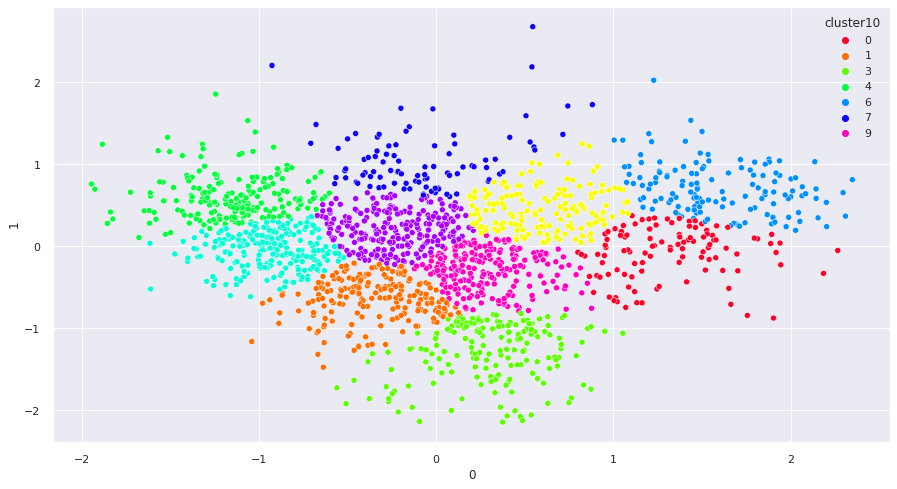

In [60]:
# k = 10 시각화

x = X_PCA.iloc[:,0]
y = X_PCA.iloc[:,1]

sns.set(rc={"figure.figsize":(15, 8)})
sns.scatterplot(x=x, y=y, hue='cluster10', data=df_soundwave, palette='gist_rainbow');

> - k = 20

In [64]:
n_clusters = 20
random_state=2022

km20 = KMeans(init='k-means++', n_clusters=n_clusters, random_state=random_state)
km20.fit(X_PCA)

KMeans(n_clusters=20, random_state=2022)

In [65]:
# 중심점(centroids) 위치
centers20 = km20.cluster_centers_
centers20

array([[ 0.23403395, -0.19154263],
       [-0.26309412,  0.90215343],
       [ 1.50270087,  0.15367863],
       [-1.02964838, -0.10167642],
       [ 0.48840205, -1.05038259],
       [-0.00876985,  0.30866342],
       [-1.28279571,  0.4520993 ],
       [ 1.24446327,  0.83680232],
       [-0.307151  , -1.36364311],
       [ 1.01771362, -0.41295469],
       [ 1.93717708,  0.64060206],
       [-0.55519949, -0.55276232],
       [ 0.72776256,  0.25097859],
       [ 0.38103274, -1.66230756],
       [-0.36892079, -0.07336246],
       [ 0.05450309, -0.72149764],
       [ 0.50171166,  1.75421252],
       [ 0.43465297,  0.74010161],
       [-0.73628975,  0.35765486],
       [-1.13285022,  1.01321482]])

In [66]:
# 군집화 결과 라벨링 기존 데이터 프레임에 새로운 컬럼으로 삽입하기
df_soundwave['cluster20'] = km20.fit_predict(X_PCA)

In [67]:
df_soundwave.tail(3)

,song,centroid_max,centroid_min,centroid_mean,centroid_std,centroid_kurtosis,centroid_skew,roloff_max,roloff_min,roloff_mean,...,mfcc_19_min,mfcc_19_mean,mfcc_19_std,mfcc_19_kurtosis,mfcc_19_skew,tempo,cluster6,cluster8,cluster10,cluster20
1812,10분 내로-김연자_30.wav,6896.682494,1443.729408,2949.338935,703.271173,5.844847,1.890425,9722.241211,2680.883789,6646.676475,...,-23.750210,3.242226,9.922538,0.505130,0.671343,143.554688,4,7,8,14
1813,사랑의 트위스트-설운도_30.wav,5206.455338,854.989721,2361.416274,520.588591,3.560736,0.544171,8613.281250,1324.291992,4815.887546,...,-15.746796,4.046974,6.830245,0.075743,0.327824,161.499023,4,0,1,15
1814,짱가-김건모_30.wav,6087.494942,485.565736,2149.236477,644.260918,6.725649,1.830110,9043.945312,829.028320,4427.498228,...,-35.748447,-1.844921,9.352575,0.876417,-0.038484,107.666016,1,5,8,5


In [68]:
# 클러스터 레이블 확인
new_labels20 = km20.labels_

# 클러스터링 결과 각 데이터 갯수
np.unique(new_labels20, axis=0, return_counts=1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19], dtype=int32),
 array([163,  71,  82, 136,  80, 134, 123,  74,  47,  51,  58, 114, 105,
         54, 136, 128,  13,  68, 126,  52]))

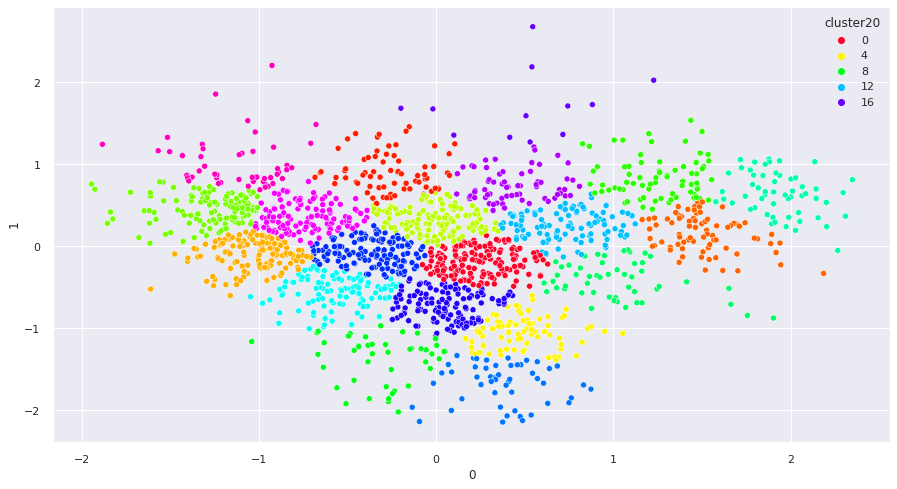

In [69]:
# k = 8 시각화

x = X_PCA.iloc[:,0]
y = X_PCA.iloc[:,1]

sns.set(rc={"figure.figsize":(15, 8)})
sns.scatterplot(x=x, y=y, hue='cluster20', data=df_soundwave, palette='gist_rainbow');

### 전체 비교

In [ ]:
# 데이터프레임에서 컬럼명 삭제하기
#df_soundwave.drop(['cluster12','cluster13','cluster14','cluster15'], axis=1, inplace=True)

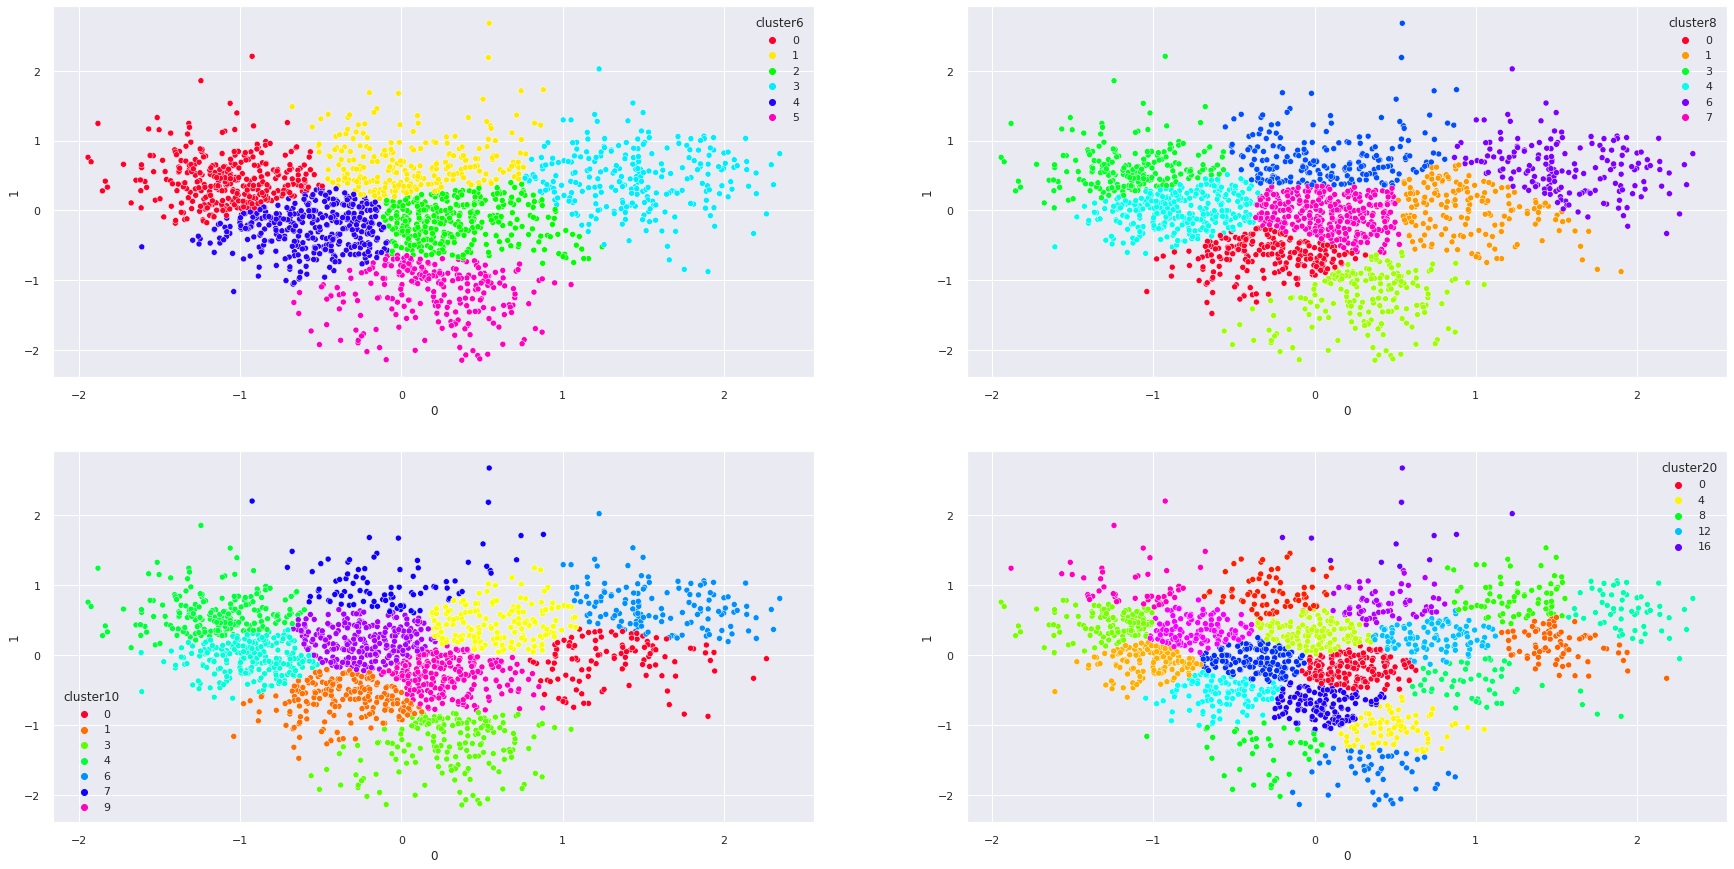

In [71]:
# 결과값 비교하기 (시각화 그래프 활용)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(30,15))

sns.scatterplot(x=x, y=y, hue='cluster6', data=df_soundwave, palette='gist_rainbow', ax=ax[0][0])
#plt.scatter(centers10[:, 2], centers10[:, 3], c='red', alpha=0.5, s=150)

sns.scatterplot(x=x, y=y, hue='cluster8', data=df_soundwave, palette='gist_rainbow', ax=ax[0][1]);
#plt.scatter(centers11[:, 2], centers11[:, 3], c='red', alpha=0.5, s=150)

sns.scatterplot(x=x, y=y, hue='cluster10', data=df_soundwave, palette='gist_rainbow', ax=ax[1][0]);

sns.scatterplot(x=x, y=y, hue='cluster20', data=df_soundwave, palette='gist_rainbow', ax=ax[1][1]);

- 정확도 계산
    - 실루엣 점수
        - 모든 데이터에 대한 실루엣 계수의 평균
        - `(b-a) / max(a,b)`
            - a는 동일한 클러스터 내 다른 데이터와 자기 자신 데이터와의 평균 거리입니다(클러스터 내부의 평균 거리). 
            - b는 자기가 속한 클러스터를 제외하고 가장 가까운 클러스터의 데이터까지 평균 거리입니다. 계수는 −1에서 1까지 바뀔 수 있습니다. 
> - `+1`에 가까우면 b 즉 다른 클러스터와 멀면서, a 자기가 속한 클러스터 내 데이터들과 가깝고 `잘 뭉쳐져있다`는 뜻이고, `−1`에 가깝다면, 반대이기 때문에 `잘못된 클러스터에 할당`되었다는 의미입니다.

In [61]:
from sklearn.metrics import silhouette_score

silhouette_score(X_PCA, km6.labels_)

0.36597345186483526

In [62]:
silhouette_score(X_PCA, km8.labels_)

0.3306659436424501

In [63]:
silhouette_score(X_PCA, km10.labels_)

0.34268973486318466

In [80]:
silhouette_score(X_PCA, km20.labels_)

0.3385989094003951

> - k = 6 이 정확도 제일 높음 ... 그치만 비교적 모두 정확도가 높지 않음

- 참고 사이트
    - 비지도 학습_군집 : https://subinium.github.io/MLwithPython-3-5/
    - kmeans 코드 : https://todayisbetterthanyesterday.tistory.com/60
    - kmeans 설명 : https://hanawithdata.tistory.com/entry/K-means-Clustering-with-Python
    - kmeans 정확도 검사 : https://box-world.tistory.com/62

### 클러스터링 된 노래 목록 비교해보기

In [ ]:
df_soundwave

,song,centroid_max,centroid_min,centroid_mean,centroid_std,centroid_kurtosis,centroid_skew,roloff_max,roloff_min,roloff_mean,...,mfcc_18_skew,mfcc_19_max,mfcc_19_min,mfcc_19_mean,mfcc_19_std,mfcc_19_kurtosis,mfcc_19_skew,tempo,cluster10,cluster11
0,blues.00000.wav,4031.364538,1027.079258,1784.420446,360.263361,5.246790,1.537974,7644.287109,1830.322266,3806.485316,...,0.492951,32.866340,-23.219631,1.219928,6.853561,0.534537,0.258880,123.046875,7,8
1,blues.00002.wav,4669.770713,417.254802,1552.481958,395.634070,11.609763,1.930126,6556.860352,441.430664,3040.514948,...,0.675960,16.524359,-29.785427,-2.226821,5.529573,0.976377,-0.080558,161.499023,8,8
2,blues.00003.wav,3236.442116,318.713500,1070.119953,429.532791,1.803354,1.001449,7611.987305,387.597656,2185.028454,...,-0.124392,16.595015,-21.426250,-3.408233,5.654808,0.880601,0.255001,172.265625,8,8
3,blues.00004.wav,4464.156642,849.658285,1835.494603,585.961468,1.536058,1.049734,7084.423828,1152.026367,3580.945013,...,-0.042242,4.889854,-41.730530,-11.703781,7.432079,0.651141,-0.701559,135.999178,8,8
4,blues.00010.wav,3202.187008,436.072310,1410.469096,453.302918,0.489085,0.669760,6707.592773,516.796875,2767.274933,...,-0.062250,20.802301,-29.235157,-4.986113,6.826524,1.310209,0.176304,161.499023,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,rock.00095.wav,4493.780095,928.102055,2008.581132,531.170411,2.519661,1.284807,7902.685547,1894.921875,4254.215942,...,-0.538604,21.106041,-22.082030,-1.189238,7.068684,0.069182,-0.018390,103.359375,7,1
995,rock.00094.wav,3958.563217,1727.080720,2629.346944,306.122150,0.889462,0.539890,7192.089844,3908.276367,5086.735908,...,0.455727,20.615631,-16.877655,2.251966,6.207781,-0.194352,0.089831,112.347147,6,5
996,rock.00091.wav,4564.080112,1243.158267,2474.462256,508.230444,1.316006,0.984008,7773.486328,2670.117188,4754.529583,...,0.001973,19.045689,-16.979542,-0.845949,4.901772,0.549127,0.175726,143.554688,6,5
997,rock.00099.wav,4006.645658,437.156737,1609.442919,649.899970,0.192579,0.581832,7601.220703,322.998047,3246.280370,...,-0.011078,29.696540,-21.608267,1.158525,7.048834,0.793912,0.589480,123.046875,1,3


In [73]:
# 클러스터링 결과 인덱스로 찾기
print(df_soundwave.index[df_soundwave['cluster20'] == 16].tolist())

[29, 503, 970, 1025, 1027, 1028, 1066, 1167, 1171, 1578, 1580, 1615, 1683]


In [79]:
# 인덱스 값 검색하기
df_soundwave.iloc[1683]['song']

'배 띄어라-홍지윤_30.wav'

### csv 파일 저장

In [81]:
df_clustered = df_soundwave[['song', 'cluster6', 'cluster8', 'cluster10', 'cluster20']]

In [82]:
df_clustered

,song,cluster6,cluster8,cluster10,cluster20
0,blues.00000.wav,2,7,9,15
1,blues.00002.wav,2,7,9,0
2,blues.00003.wav,2,7,2,12
3,blues.00004.wav,2,1,2,12
4,blues.00010.wav,1,5,2,17
...,...,...,...,...,...
1810,항구의 남자-박상철_30.wav,2,7,9,0
1811,호랑나비-김흥국_30.wav,2,7,9,0
1812,10분 내로-김연자_30.wav,4,7,8,14
1813,사랑의 트위스트-설운도_30.wav,4,0,1,15


In [83]:
# export the data
filename = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
df_clustered.to_csv(f'/content/drive/Othercomputers/내 노트북/Project/Models/Music_Genre_Classification_Recommendation/Clustering_Result_csv/{filename}.csv')